# Assignment 02

This is the Text Processing project.

See Canvas for its deadline. 

In [1]:
# import packages
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re
from urllib.parse import urlparse
import urllib.robotparser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# This code checks the robots.txt file
def canFetch(url):

    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

## Assignment 02 examples

#### Example 0 of project for assignment 02: Text processing

1) perform the analysis of data/ira.csv (similarly to what done in processing_text.ipynb, including most frequent words etc.)

2) perform sentiment analysis on this dataset

3) detail comments, explain step by step what is happening, and try to write down a paragraph or two at the end discussing what you figured out

************
#### Example 1 of project for assignment 02: Text processing

1) Choose a short list of famous people (at least 2) that you want to compare and look for their Wikipedia page, e.g., 
urls = []
urls.append("https://en.wikipedia.org/wiki/LeBron_James")
urls.append("https://en.wikipedia.org/wiki/Michael_Jordan")
urls.append("https://en.wikipedia.org/wiki/Karl_Malone")

2) think about an interesting question you can answer. E.g., 
- in which of the three pages the word "record" appears more often? (we know how to search!)
- which is the most positive page? (we know how to do sentiment analysis!)
- in which year was each player born? (more complicated, but we can do it)

3) make sure you can web scrape each page

4) write the code to web scrape and do your analysis

5) prepare 1 (one) .ipynb , in which you have code, results and (most importantly) you describe what you are looking for and how you do it!

************
#### Example 2 of project for assignment 02: Text processing

1) check the books you like from https://www.gutenberg.org/browse/scores/top

2) you have an example in data/book1.txt ; choose 1 book (or a few of them)

3) think about an interesting question you can answer. E.g., 
- which are the most common words? (we know how to do it!)
- is there a particular word you have in mind? (easy to check)
- how many different words do we have?

4) can we download it automatically or better to do it manually? *CHECK BEFORE DOING IT!*
- in case we can not do it automatically, let's respect it! we can download them manually and save them

5) let's analyze the book, we have all the tools from the notebooks processing_text and RegularExpressions! 


# Project title: 

your comments / presentation


In [2]:
# Some questions that I'm interested in about The Great Gatsby:
# Is the most frequently appeared character Gatsby or Nick?
# What about the frequencies of other character names?
# Can we use the frequencies of names for each chapter to guess where the climax of the book occurs?
# Which characters appear in the climax of the book?
# What about the sentiment of each chapter? (My guess is neutral)
# Can we compare the sentiment of the chapter where the climax occurs with the sentiments of other chapters?
# What about the famous symbolism "Green Light"? Where does that occur?

In [3]:
# your code

In [4]:
# read the txt file of The Great Gatsby
tgg_text = open('data/TGG.txt').read()

In [5]:
# The first 3000 characters
tgg_text[:3000]

'The Project Gutenberg eBook of The Great Gatsby, by F. Scott Fitzgerald\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: The Great Gatsby\n\nAuthor: F. Scott Fitzgerald\n\nRelease Date: January 17, 2021 [eBook #64317]\n[Most recently updated: January 24 2021]\n\nLanguage: English\n\n\nProduced by: Alex Cabal for the Standard Ebooks project, based on a\n             transcription produced for Project Gutenberg Australia.\n\n*** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***\n\n\n\t\t\t   The Great Gatsby\n\t\t\t\t  by\n\t\t\t F. Scott Fitzgerald\n\n\n                   

In [6]:
print(tgg_text[:3000])

The Project Gutenberg eBook of The Great Gatsby, by F. Scott Fitzgerald

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Great Gatsby

Author: F. Scott Fitzgerald

Release Date: January 17, 2021 [eBook #64317]
[Most recently updated: January 24 2021]

Language: English


Produced by: Alex Cabal for the Standard Ebooks project, based on a
             transcription produced for Project Gutenberg Australia.

*** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***


			   The Great Gatsby
				  by
			 F. Scott Fitzgerald


                           Table of Contents

I
II
III
IV
V
V

In [7]:
# split the book into chapters
chapters = tgg_text.split('CHAPTER')
chapters[0]

'The Project Gutenberg eBook of The Great Gatsby, by F. Scott Fitzgerald\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: The Great Gatsby\n\nAuthor: F. Scott Fitzgerald\n\nRelease Date: January 17, 2021 [eBook #64317]\n[Most recently updated: January 24 2021]\n\nLanguage: English\n\n\nProduced by: Alex Cabal for the Standard Ebooks project, based on a\n             transcription produced for Project Gutenberg Australia.\n\n*** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***\n\n\n\t\t\t   The Great Gatsby\n\t\t\t\t  by\n\t\t\t F. Scott Fitzgerald\n\n\n                   

In [8]:
# replace all the special characters
_chapters = []
for chapter in chapters:
    new_chapter = chapter.replace('\n', ' ').replace('\r', '').replace('\t', ' ')
    _chapters.append(new_chapter)
_chapters[0]

'The Project Gutenberg eBook of The Great Gatsby, by F. Scott Fitzgerald  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Great Gatsby  Author: F. Scott Fitzgerald  Release Date: January 17, 2021 [eBook #64317] [Most recently updated: January 24 2021]  Language: English   Produced by: Alex Cabal for the Standard Ebooks project, based on a              transcription produced for Project Gutenberg Australia.  *** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***         The Great Gatsby       by     F. Scott Fitzgerald                              Table of Contents  I II III IV V 

In [9]:
# show the chapters in a data frame
# chapter 0 is not in the main content of the book
pd.DataFrame().assign(chapters=_chapters)

,chapters
0,The Project Gutenberg eBook of The Great Gatsb...
1,I In my younger and more vulnerable years my...
2,II About halfway between West Egg and New Yo...
3,III There was music from my neighbour’s hous...
4,IV On Sunday morning while church bells rang...
5,V When I came home to West Egg that night I ...
6,VI About this time an ambitious young report...
7,VII It was when curiosity about Gatsby was a...
8,VIII I couldn’t sleep all night; a foghorn w...
9,IX After two years I remember the rest of th...


In [10]:
# The number of times each main character's name appears in each chapter
# Gatsby for Jay Gatsby
# Daisy for Daisy Buchanan
# Nick and I (first-person narrative) for Nick Carraway
# Myrtle for Myrtle Wilson
# Tom for Tom Buchanan
counts = pd.DataFrame().assign(
    Gatsby=np.char.count(_chapters, 'Gatsby'),
    Daisy=np.char.count(_chapters, 'Daisy'),
    Nick=np.char.count(_chapters, 'Nick') + np.char.count(chapters, ' I '),
    Myrtle=np.char.count(_chapters, 'Myrtle'),
    Tom=np.char.count(_chapters, 'Tom')
)
counts

,Gatsby,Daisy,Nick,Myrtle,Tom
0,3,0,1,0,0
1,12,30,117,0,33
2,1,6,77,15,30
3,28,1,105,0,0
4,38,15,109,0,10
5,36,26,75,0,3
6,37,19,45,0,21
7,63,61,133,5,87
8,21,19,52,2,3
9,27,9,141,1,5


In [11]:
# As we can see, the most frequently appeared character name is Nick followed by Gatsby
    # This is not surprising because the book is written using Nick's narrative (so a lot of 'I')
# If we look closely, for the 4 main characters, Gatsby, Daisy, Nick, and Tom,
    # The highest frequencies for all of them (except for Nick) occur in chapter 7
    # Thus, I guess chapter 7 is the climax of the book (actually it is, when 4 of them got into a fight)
# Nick's name ('Nick' and 'I') has unusually high frequencies in Chapter 1 and 9,
    # corresponding to the introduction and conclusion of the book
# Myrtle's name first occurs in chapter 2, then from chapter 3 to 6, it's not mentioned.
    # Then, when it comes to the climax and the end, Myrtle's name appears again
    # Something tells me that Myrtle is not a main character but plays an important role in the climax
    # (Actually, Myrtle is the mistress of Tom and is killed by Daisy when she drives her and Gatsby back in the climax)
# The appearances of Tom are also intermittent with an unusually high one in chapter 7

In [12]:
# We can also view the accumulated frequencies

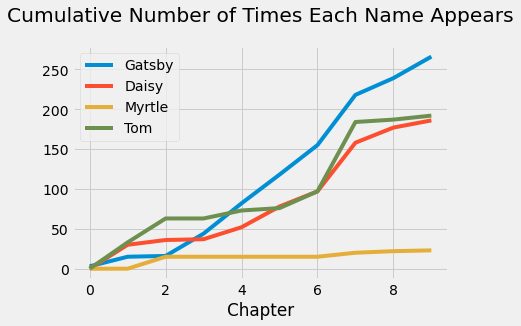

In [13]:
pd.DataFrame().assign(
    Gatsby=np.cumsum(counts.get('Gatsby')),
    Daisy=np.cumsum(counts.get('Daisy')),
#     Nick=np.cumsum(counts.get('Nick')),
    Myrtle=np.cumsum(counts.get('Myrtle')),
    Tom=np.cumsum(counts.get('Tom')),
    Chapter=np.arange(0, 10, 1),
).plot(x='Chapter')

plt.title('Cumulative Number of Times Each Name Appears', y=1.08);

In [14]:
# Notice the sudden increase in frequencies from chapter 6 to chapter 7 (climax)

In [15]:
# Prepare for the sentiment analysis
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/zih020/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Sentiment for each chapter
chapter_sentiments = []
[chapter_sentiments.append(sid.polarity_scores(chapter)) for chapter in _chapters]
chapter_sentiments

[{'neg': 0.034, 'neu': 0.846, 'pos': 0.121, 'compound': 0.9695},
 {'neg': 0.081, 'neu': 0.803, 'pos': 0.116, 'compound': 0.9998},
 {'neg': 0.075, 'neu': 0.847, 'pos': 0.078, 'compound': 0.9884},
 {'neg': 0.072, 'neu': 0.8, 'pos': 0.128, 'compound': 0.9999},
 {'neg': 0.065, 'neu': 0.831, 'pos': 0.104, 'compound': 0.9997},
 {'neg': 0.078, 'neu': 0.816, 'pos': 0.106, 'compound': 0.9994},
 {'neg': 0.07, 'neu': 0.821, 'pos': 0.109, 'compound': 0.9996},
 {'neg': 0.092, 'neu': 0.819, 'pos': 0.089, 'compound': 0.8323},
 {'neg': 0.071, 'neu': 0.815, 'pos': 0.114, 'compound': 0.9997},
 {'neg': 0.079, 'neu': 0.815, 'pos': 0.106, 'compound': 0.9998}]

In [17]:
# It's not surprising that the sentiment of TGG is mostly neutral
    # This is because Nick is mostly narrating the story without extreme emotions or criticisms
# However, there's a fluctuation in chapter 7
    # In chapter 7, the negative score (0.092) is higer than any other negative score by about 0.015 in average
    # It's not coincident that this chapter is also likely the climax of the book 
        # where the characters' names occur the most frequently
    # (In fact, I think the reason why the sentiment of chapter 7 is slightly more negative is because
        # of the fight between Gatsby, Daisy, and Tom)

In [18]:
# The symbolism "Green Light"

In [19]:
greenlight = pd.DataFrame().assign(
    GreenLight=np.char.count(_chapters, 'green light'),
)
greenlight

,GreenLight
0,0
1,1
2,0
3,0
4,0
5,2
6,0
7,0
8,0
9,2


In [20]:
# The symbolism "Green Light" first occurs in chapter 1 (foreshadowing: Gatsby looking at Daisy's house)
# Then, it occurs twice in chapter 5 (before the climax, when Daisy and Gatsby start to go out again)
# Lastly, it occurs in chapter 9 (the ending, after Gatsby's death, Nick's analysis for the whole situation)

In [21]:
# Wow